In [15]:
import tensorflow as tf
import os 
    
runs = []

for folder in os.listdir('TBLOGS'):
    for event in os.listdir(f'TBLOGS/{folder}'):
        run = {'acc':[],'loss':[],'val_acc': [], 'val_loss' : []}
        for e in tf.train.summary_iterator(f'TBLOGS/{folder}/{event}'):
            for v in e.summary.value:
                if v.tag in run:
                    run[v.tag].append(v.simple_value)
        runs.append(run)

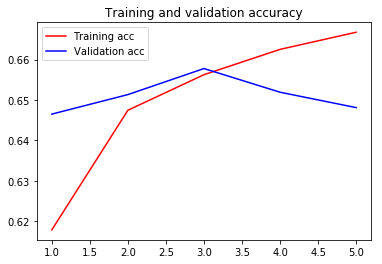

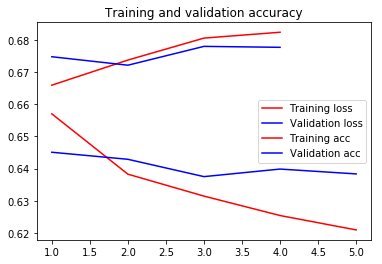

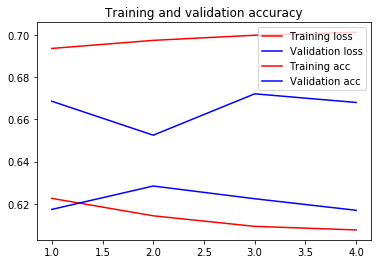

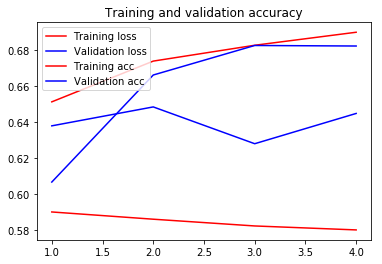

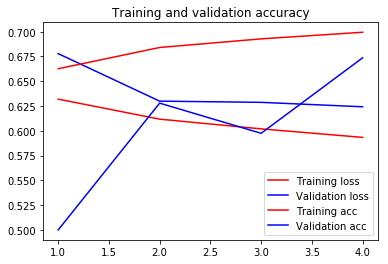

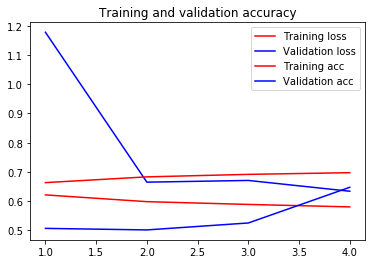

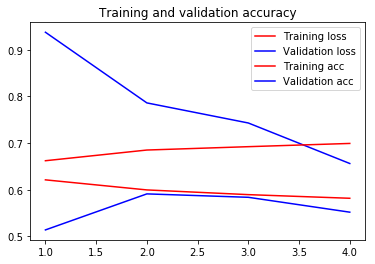

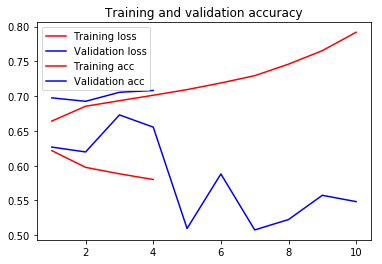

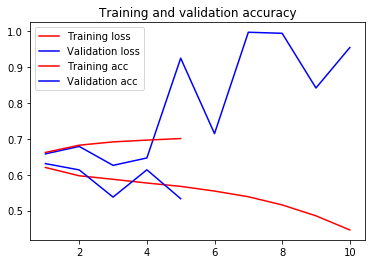

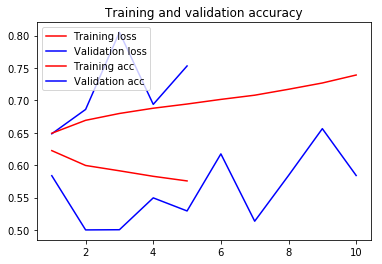

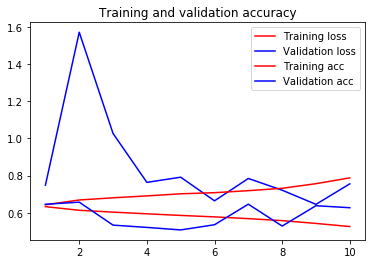

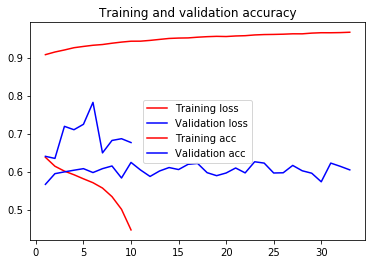

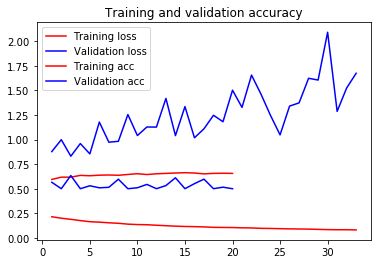

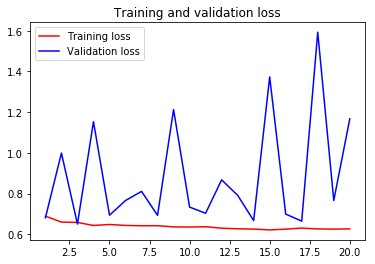

In [38]:
import matplotlib.pyplot as plt



i = 0
for run in runs:
    if len(list(run.values())[0]) > 2:
        i += 1
        history = run

        acc = history['acc']
        val_acc = history['val_acc']
        loss = history['loss']
        val_loss = history['val_loss']
        epochs = range(1, len(acc) + 1)

        plt.title('Training and validation accuracy')
        plt.plot(epochs, acc, 'red', label='Training acc')
        plt.plot(epochs, val_acc, 'blue', label='Validation acc')
        plt.legend()
        plt.savefig(f'results/MyNet/acc_{i}.png')
        
        plt.figure()
        plt.title('Training and validation loss')
        plt.plot(epochs, loss, 'red', label='Training loss')
        plt.plot(epochs, val_loss, 'blue', label='Validation loss')

        plt.legend()
        plt.savefig(f'results/MyNet/loss_{i}.png')

In [36]:
len([run for run in runs if len(list(run.values())[0])>2])

13